# Importar librerias

- pandas
- matplotlib.pyplot
- seaborn

# Cargar datos

Cargar el archivo `mediciones.csv`

Ver que tipo de datos contiene

# Outliers

## Metodo intercuantil

Calcular:
-  Q1 y Q3
- IQR
- Q1 - 1.5 * IQR
- Q3 + 1.5 * IQR

Cuantos outliers hay en total (puntos mas alla de los "bigotes")

## Metodo z-score:

Calcular el z-score para todos los datos y ver cuantos:
- superan el 95%
- estan por debajo del 5% 

## Visual con boxplot

Hacer un boxplot para ver los outliers de la variable medida (voltaje)

La cantidad de outliers que aparecen es consistente con el resultado analitico? 

Hacer un scatterplot de voltaje vs tiempo para visualizar la señal de otra manera.

In [ ]:
sns.scatterplot()

Hacer un plot con lineas del mismo grafico

Hacer un zoom del plot solo con los primeros 1000 datos

### Electrocardiograma

Es un electrocardiograma!  

Los outliers son los picos de la señal. Hubiese sido incorrecto eliminarlos o corregir su valor.

Un dato util a extraer es el tiempo entre picos. La pregunta es como hacerlo.

Opciones:
* Filtrar el dataframe con un umbral de voltaje
    * Este metodo podria no ser preciso 
* Buscar los picos y luego el indice donde hay un maximo dentro de el
    * a veces conviene empezar a buscarlos manualmente y luego tratar de ir generalizando el metodo para llevarlo a un proceso automatico.

Este proceso es el mas trabajoso de este analisis. Hay que usar la imaginacion y la cabeza. :)



### Seleccion por umbral

Seleccionemos todos los puntos donde el voltaje supera un valor fijo

In [86]:
seleccion = df.voltaje > 11.5

Creamos un nuevo dataframe con solo las filas que nos interesan

In [94]:
df2 = df.loc[seleccion]

Veamos el plot de las primeras 50 filas

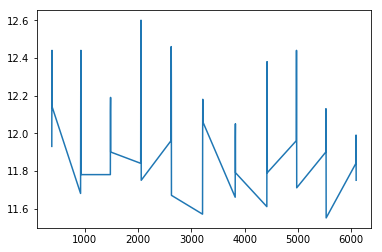

In [99]:
plt.plot(df2.tiempo[:50], df2.voltaje[:50], "-")

In [100]:
df2.head()

,tiempo,voltaje
183,380.689655,11.93
184,382.758621,12.32
185,384.827586,12.44
186,386.896552,12.14
444,920.689655,11.68


### Importo numpy (aunque deberia moverlo al principio)

In [29]:
import numpy as np

Voy a calcular el diff de los elementos de la columna tiempo.

Si tengo un array A = [a0, a1, a2, ...]

np.diff(A) es [a1-a0 , a2-a1 , a3-a2, ...]

es la resta entre un elemento y su inmediato anterior.

*Nota:* diff siempre devuelve un array con un elemento menos que el original.

In [101]:
deltaT = np.diff(df2.tiempo)

Veamos que resulta el diff de tiempo (ya filtrado y guardado en df2)

In [107]:
deltaT[:50]

array([  2.06896552,   2.06896552,   2.06896552, 533.79310345,
         2.06896552,   2.06896552,   2.06896552,   2.06896552,
         2.06896552, 548.27586207,   2.06896552,   2.06896552,
         2.06896552, 562.75862069,   2.06896552,   2.06896552,
         2.06896552,   2.06896552,   2.06896552, 558.62068966,
         2.06896552,   2.06896552,   2.06896552,   2.06896552,
       583.44827586,   2.06896552,   2.06896552,   2.06896552,
       606.20689655,   2.06896552,   2.06896552,   2.06896552,
       587.5862069 ,   2.06896552,   2.06896552,   2.06896552,
         2.06896552, 544.13793103,   2.06896552,   2.06896552,
         2.06896552,   2.06896552, 546.20689655,   2.06896552,
         2.06896552,   2.06896552, 558.62068966,   2.06896552,
         2.06896552, 564.82758621])

Se ve que hay varios que difieren en poco (2.1) y algunos que difieren en mucho (500+).

Este salto es el tiempo entre picos

In [108]:
picos = deltaT[deltaT>100]

Veamos si hay outliers en los tiempos entre picos

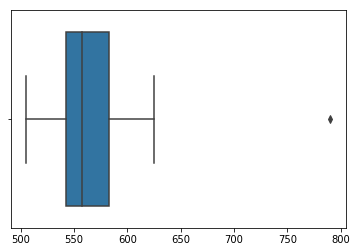

In [109]:
sns.boxplot(picos)

### Calculemos Latidos por Minuto

In [104]:
lxm = 60000/picos

In [105]:
lxm

array([112.40310078, 109.43396226, 106.61764706, 107.40740741,
       102.83687943,  98.97610922, 102.11267606, 110.2661597 ,
       109.84848485, 107.40740741, 106.22710623, 103.94265233,
        75.91623037,  97.97297297, 103.94265233, 100.69444444,
        98.97610922, 102.47349823, 109.02255639, 107.80669145,
        96.66666667,  96.02649007, 105.45454545, 104.31654676,
       110.6870229 , 109.02255639, 110.6870229 , 113.7254902 ,
       113.28125   , 113.7254902 , 118.85245902, 116.46586345,
       114.17322835, 115.53784861, 110.6870229 , 103.57142857,
       108.61423221, 109.84848485])

Veamos el histograma

(array([ 1.,  0.,  0.,  0.,  2.,  4.,  8., 11.,  9.,  3.]),
 array([ 75.91623037,  80.20985323,  84.5034761 ,  88.79709896,
         93.09072183,  97.38434469, 101.67796756, 105.97159042,
        110.26521329, 114.55883615, 118.85245902]),
 <a list of 10 Patch objects>)

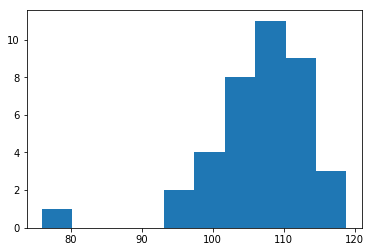

In [39]:
plt.hist(lxm)

## Figuras Extra

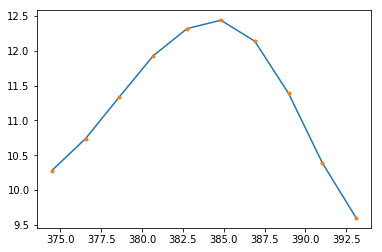

In [56]:
plt.plot(df.tiempo[180:190], df.voltaje[180:190], "-")
plt.plot(df.tiempo[180:190], df.voltaje[180:190], ".")

# Moraleja

* Los outliers no necesariamente son puntos malos
* Siempre entender de donde provienen los datos y que representan
* Analizar los outliers en contexto
* Y a veces hay que transformar los datos para obtener datos utiles (latidos por minuto)